In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
plt.rc('figure', figsize=(10, 5))
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The real data in Cabin Column is too little compare with others, so we do not consider it as an attribute to analyze.
Data in Column (PassengerId，Name,Ticket Number) are not Quantitative,Categorical and Ordinal, so we do not consider them as attributes to analyze.

In [165]:
df.drop(['Cabin','PassengerId','Name','Ticket'], axis=1) # drop useless attributes
dflive=df.loc[df['Survived'] == 1]
dflive

KeyError: "labels ['Cabin' 'PassengerId' 'Name' 'Ticket'] not contained in axis"

1. Passenger Class Analysis

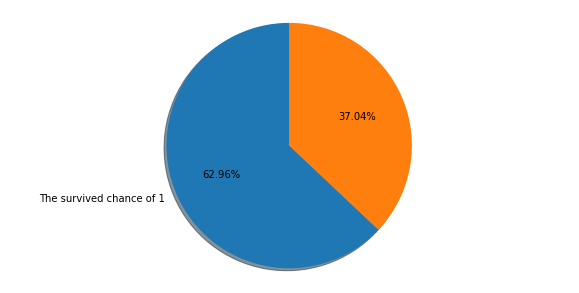

The survived chance of Passenger in Class 1 is 62.96 %


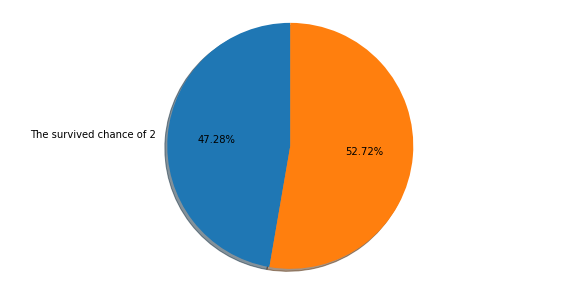

The survived chance of Passenger in Class 2 is 47.28 %


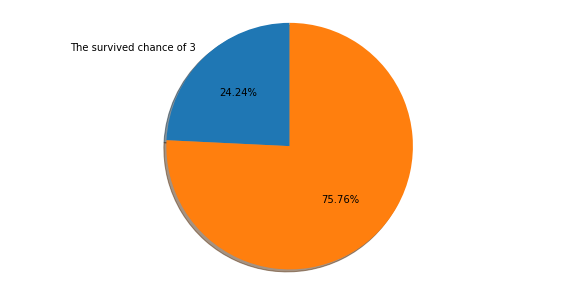

The survived chance of Passenger in Class 3 is 24.24 %


In [149]:
def drawpiechart(percent,category):
#display percentange with matplotlib
    sizes=[]
    sizes.append(percent)
    sizes.append(100-percent)
    labels = 'The survived chance of ' + category, ''
    explode = (0, 0)  # 0 explode
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
classSurvived=pd.value_counts(dflive['Pclass'].dropna().values, sort=False)#get survived counts in 3 passenger class 
classAll=pd.value_counts(df['Pclass'].dropna().values, sort=False)#get all counts in 3 passenger class

for i in range(1,4):
    classSurvivedPercent=(classSurvived[i]/classAll[i])*100
    drawpiechart(classSurvivedPercent,str(i))
    print("The survived chance of Passenger in Class %d is %.2f %%"%(i,classSurvivedPercent))

    Passenger Class Conclusion: 62.96% Upper Level Passenger Survived
                       47.28% Middle Level Passenger Survived
                       24.24% Lower Class Passenger Survived

2. Sex Analysis

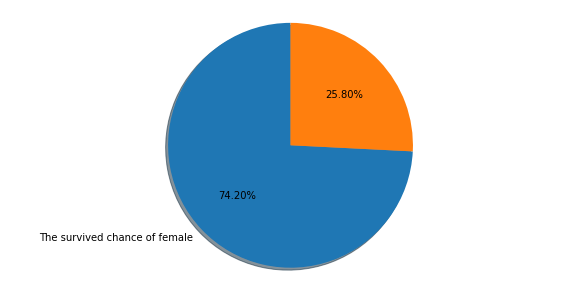

The survived chance of in female Passengers is 74.20 %


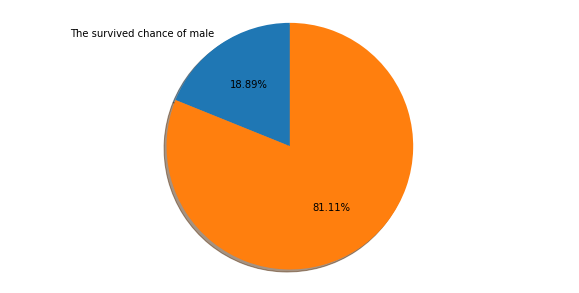

The survived chance of in male Passengers is 18.89 %


In [142]:
sexSurvived=pd.value_counts(dflive['Sex'].dropna().values, sort=False)
sexAll=pd.value_counts(df['Sex'].dropna().values, sort=False)
for i in ['female','male']:
    sexSurvivedPercent=(sexSurvived[i]/sexAll[i])*100
    drawpiechart(sexSurvivedPercent,i)
    print("The survived chance of in %s Passengers is %.2f %%"%(i,sexSurvivedPercent))

In [ ]:
    Sex Conclusion:    74.20% Female Passenger Survived
                       18.89% Male Passenger Survived

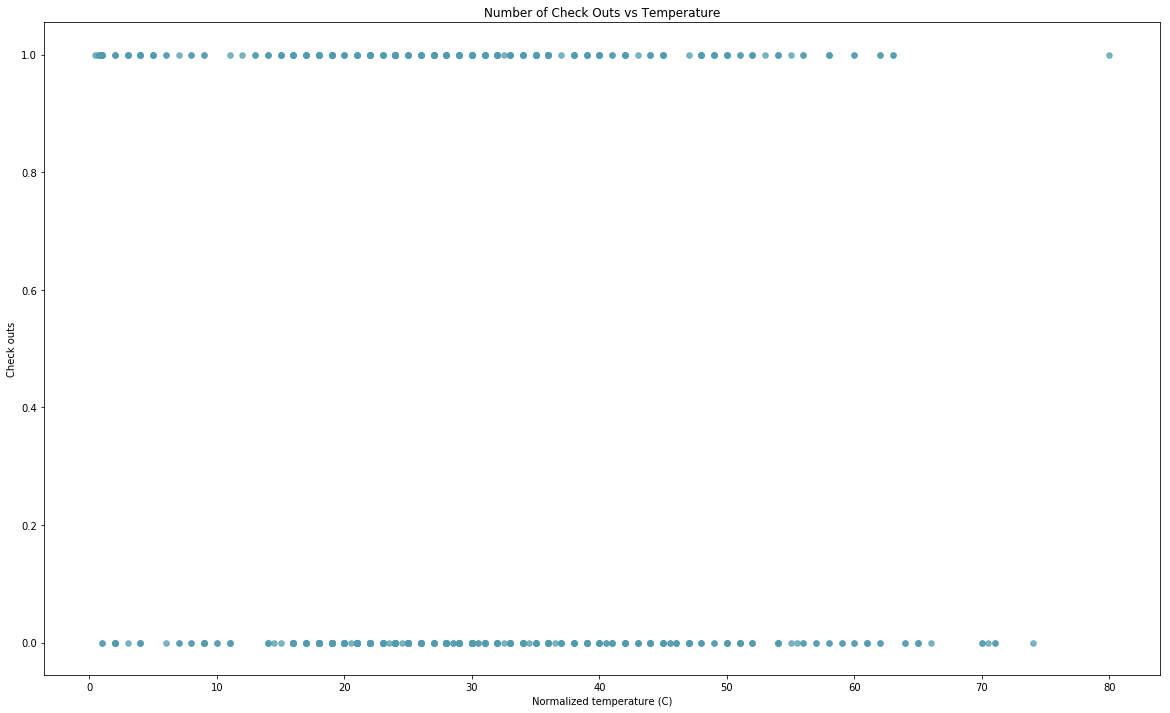

In [120]:
# Define a function to create the scatterplot. This makes it easy to
# reuse code within and across notebooks
def scatterplot(x_data, y_data, x_label, y_label, title):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Call the function to create plot
scatterplot(x_data = df['Age']
            , y_data = df['Survived']
            , x_label = 'Normalized temperature (C)'
            , y_label = 'Check outs'
            , title = 'Number of Check Outs vs Temperature')

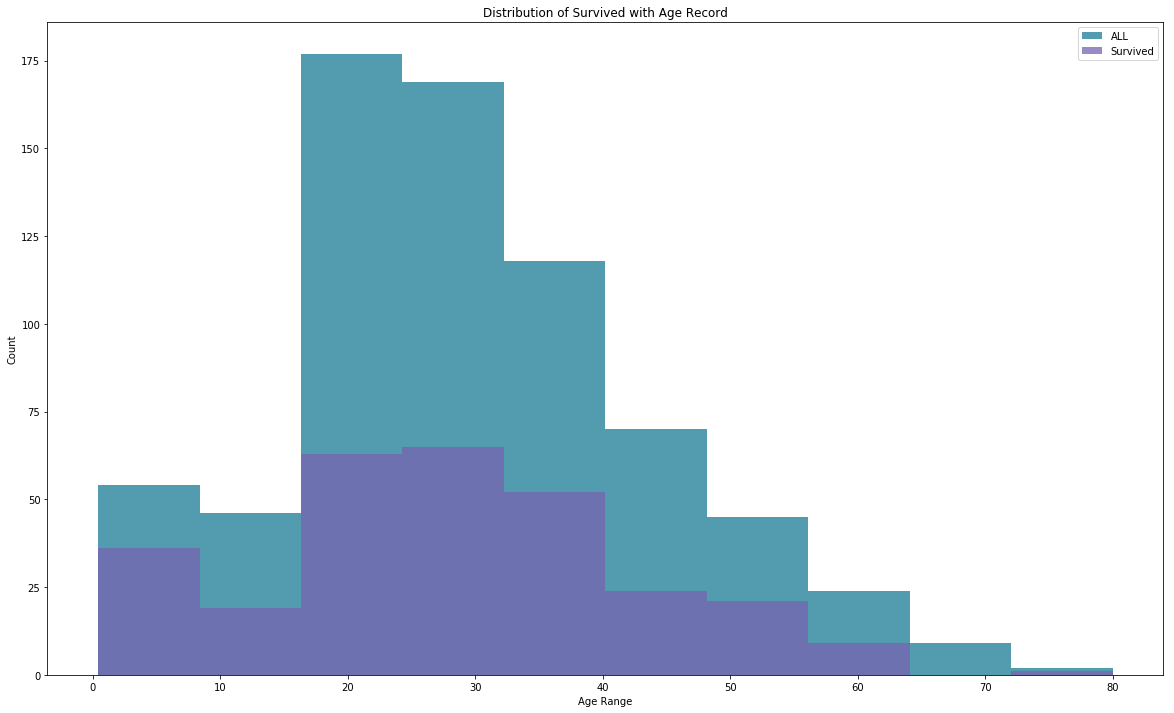

In [117]:
# Define a function for an overlaid histogram
def drawdiagram(data1, data1_name, data1_color, data2, data2_name, data2_color, x_label, y_label, title):
    # Set the bounds for the bins so that the two distributions are
    # fairly compared
    max_nbins = 10
    data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins
    bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)

    # Create the plot
    _, ax = plt.subplots()
    ax.hist(data1, bins = bins, color = data1_color, alpha = 1, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.75, label = data2_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')
dflive['Age'].dropna().describe()
# Call the function to create plot
drawdiagram(data1 = df['Age'].dropna(),data1_name = 'ALL',data1_color = '#539caf',data2 = dflive['Age'].dropna(),data2_name = 'Survived', data2_color = '#7663b0',x_label = 'Age Range', y_label = 'Count',title = 'Distribution of Survived with Age Record')


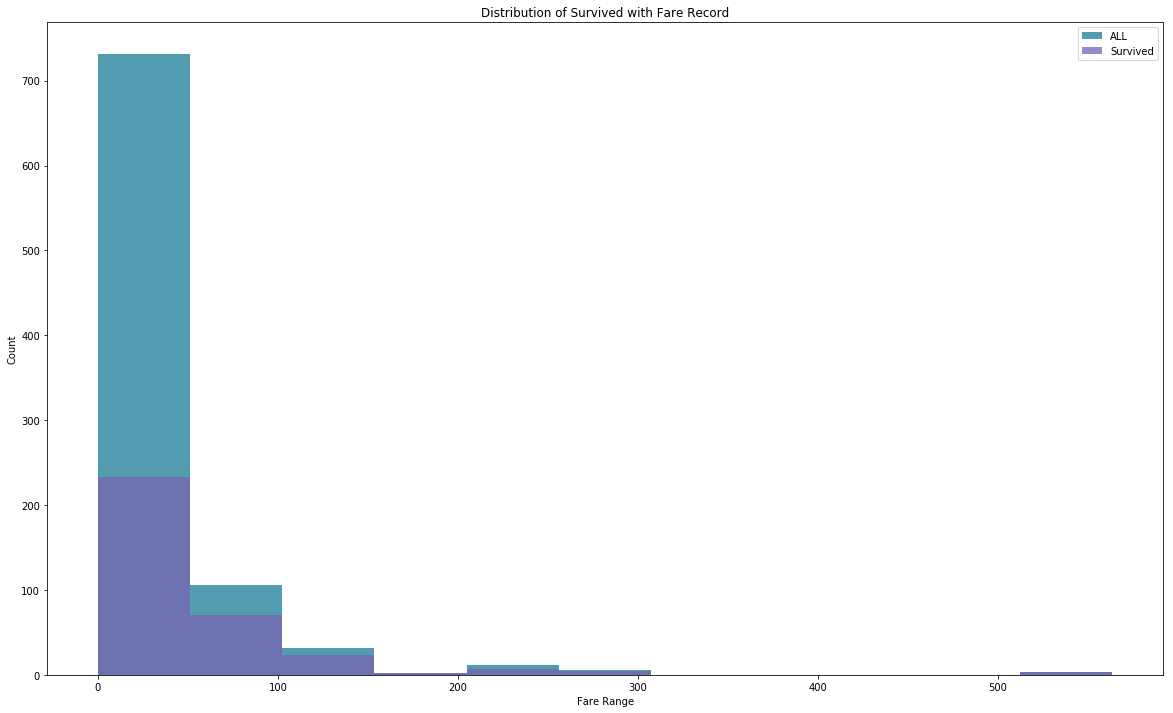

In [116]:
drawdiagram(data1 = df['Fare'].dropna(),data1_name = 'ALL',data1_color = '#539caf',data2 = dflive['Fare'].dropna(),data2_name = 'Survived', data2_color = '#7663b0',x_label = 'Fare Range', y_label = 'Count',title = 'Distribution of Survived with Fare Record')

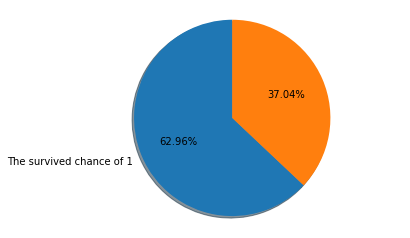

The survived chance of Passenger in Class 1 is 62.96 %


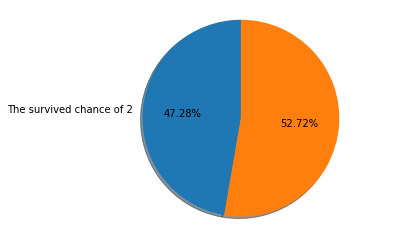

The survived chance of Passenger in Class 2 is 47.28 %


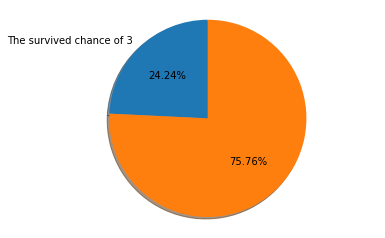

The survived chance of Passenger in Class 3 is 24.24 %


In [75]:
def drawpiechart(percent,category):
#display percentange with matplotlib
    sizes=[]
    sizes.append(percent)
    sizes.append(100-percent)
    labels = 'The survived chance of ' + category, ''
    explode = (0, 0)  # 0 explode
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
classSurvived=pd.value_counts(dflive['Pclass'].dropna().values, sort=False)#get survived counts in 3 passenger class 
classAll=pd.value_counts(df['Pclass'].dropna().values, sort=False)#get all counts in 3 passenger class
for i in range(1,4):
    classSurvivedPercent=(classSurvived[i]/classAll[i])*100
    drawpiechart(classSurvivedPercent,str(i))
    print("The survived chance of Passenger in Class %d is %.2f %%"%(i,classSurvivedPercent))
    



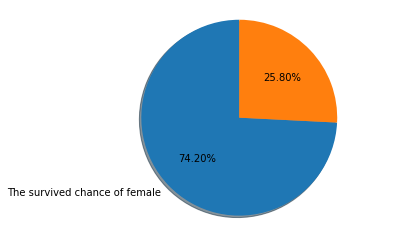

The survived chance of in female Passengers is 74.20 %


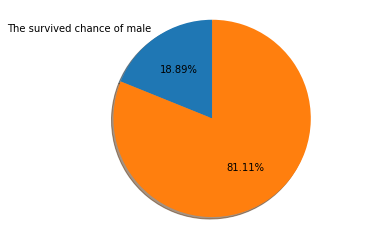

The survived chance of in male Passengers is 18.89 %


In [106]:
sexSurvived=pd.value_counts(dflive['Sex'].dropna().values, sort=False)
sexAll=pd.value_counts(df['Sex'].dropna().values, sort=False)


for i in ['female','male']:
    sexSurvivedPercent=(sexSurvived[i]/sexAll[i])*100
    drawpiechart(sexSurvivedPercent,i)
    print("The survived chance of in %s Passengers is %.2f %%"%(i,sexSurvivedPercent))




In [35]:
dflive['Fare'].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [37]:
pd.value_counts(dflive['Embarked'].values, sort=False)

S    217
C     93
Q     30
dtype: int64

In [38]:
dflive['SibSp'].describe()

count    342.000000
mean       0.473684
std        0.708688
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: SibSp, dtype: float64

In [39]:
dflive['Parch'].describe()

count    342.000000
mean       0.464912
std        0.771712
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: Parch, dtype: float64

In [40]:
df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [41]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [42]:
pd.value_counts(df['Sex'].values, sort=False)

female    314
male      577
dtype: int64

In [66]:
pd.value_counts(df['Embarked'].values, sort=False)

C    168
Q     77
S    644
dtype: int64